In [15]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT / "src"))

from pipeline import run_pipeline

run_pipeline(
    input_path="../data/raw/raw.csv",
    output_dir="../data/processed"
)



In [4]:
import pandas as pd

X_train = pd.read_csv("../data/processed/X_train.csv")
X_val   = pd.read_csv("../data/processed/X_val.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")

y_train = pd.read_csv("../data/processed/y_train.csv")
y_val   = pd.read_csv("../data/processed/y_val.csv")
y_test  = pd.read_csv("../data/processed/y_test.csv")

print("Shapes:")
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print("\nDefault rates:")
print("Train:", y_train["loan_status"].mean())
print("Val  :", y_val["loan_status"].mean())
print("Test :", y_test["loan_status"].mean())


Shapes:
(16694, 13) (16694, 1)
(3578, 13) (3578, 1)
(3578, 13) (3578, 1)

Default rates:
Train: 0.22570983586917456
Val  : 0.22554499720514254
Test : 0.22554499720514254


##### Loan Burden 


C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\1401912258.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()
C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\1401912258.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()


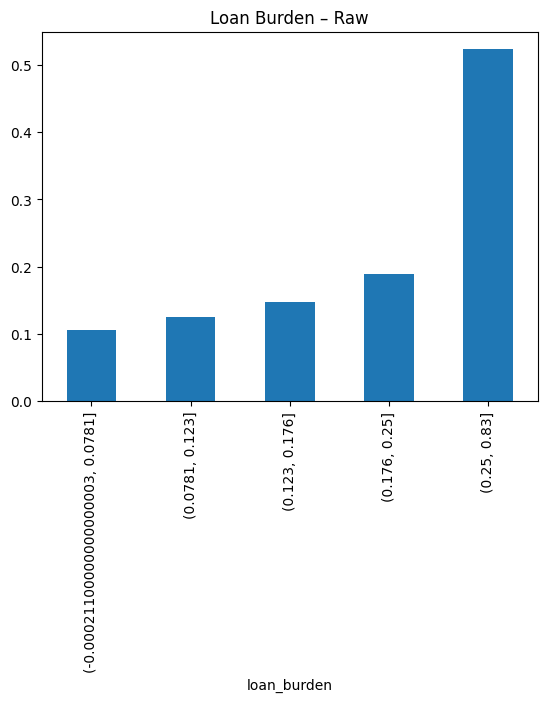

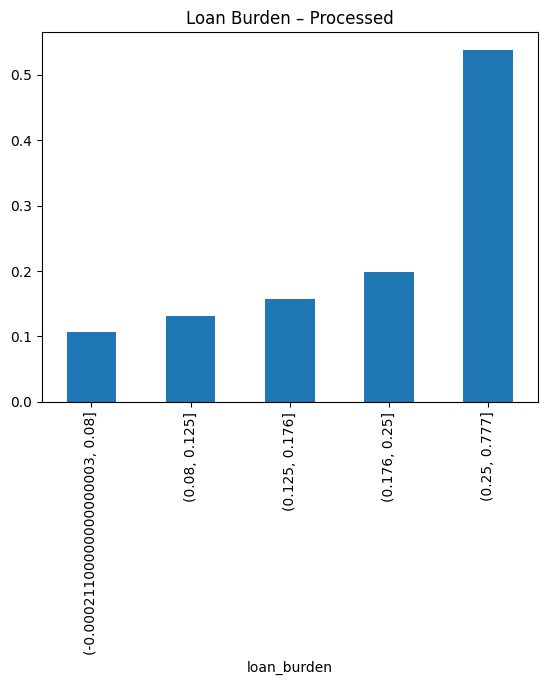

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# raw data
df_raw = pd.read_csv("../data/raw/raw.csv")
df_raw["loan_burden"] = df_raw["loan_amnt"] / df_raw["person_income"]

raw_bins = pd.qcut(df_raw["loan_burden"], 5, duplicates="drop")
raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()

# processed data
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

df_proc = X_train.copy()
df_proc["loan_status"] = y_train["loan_status"]
df_proc["loan_burden"] = df_proc["loan_amnt"] / df_proc["person_income"]

proc_bins = pd.qcut(df_proc["loan_burden"], 5, duplicates="drop")
proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()

# Plots
plt.figure()
raw_default.plot(kind="bar", title="Loan Burden – Raw")
plt.show()

plt.figure()
proc_default.plot(kind="bar", title="Loan Burden – Processed")
plt.show()


##### Employment Stability

C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\551194118.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()


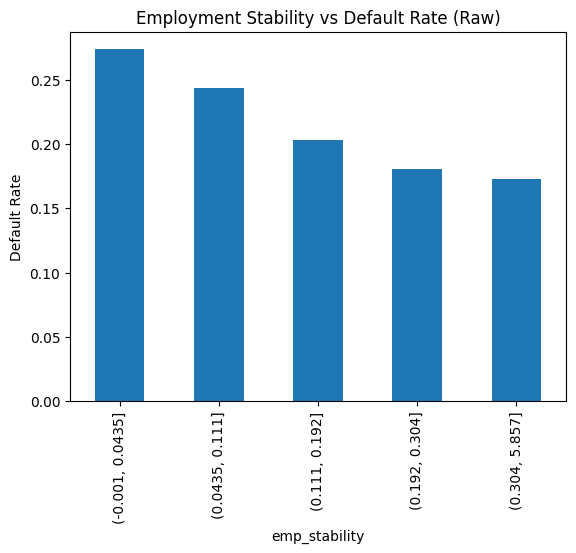

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data
df_raw = pd.read_csv("../data/raw/raw.csv")

# Create employment stability
df_raw["emp_stability"] = df_raw["person_emp_length"] / df_raw["person_age"]

# Drop invalid values just for plotting
df_raw = df_raw.replace([float("inf"), -float("inf")], pd.NA).dropna(
    subset=["emp_stability", "loan_status"]
)

raw_bins = pd.qcut(df_raw["emp_stability"], 5, duplicates="drop")
raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()

# Plot
plt.figure()
raw_default.plot(kind="bar")
plt.title("Employment Stability vs Default Rate (Raw)")
plt.ylabel("Default Rate")
plt.show()


C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\1385126702.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()


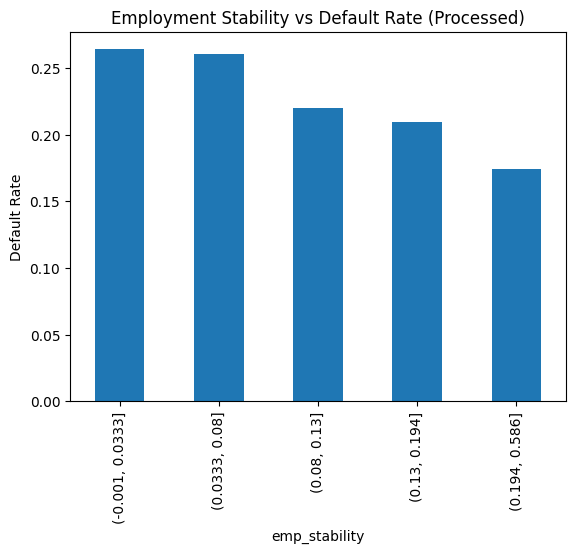

In [11]:
# Load processed train data
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

df_proc = X_train.copy()
df_proc["loan_status"] = y_train["loan_status"]

# Recreate employment stability
df_proc["emp_stability"] = df_proc["person_emp_length"] / df_proc["person_age"]

# Equal-sized buckets
proc_bins = pd.qcut(df_proc["emp_stability"], 5, duplicates="drop")
proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()

# Plot
plt.figure()
proc_default.plot(kind="bar")
plt.title("Employment Stability vs Default Rate (Processed)")
plt.ylabel("Default Rate")
plt.show()


##### Employment Length


C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\4064533607.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()


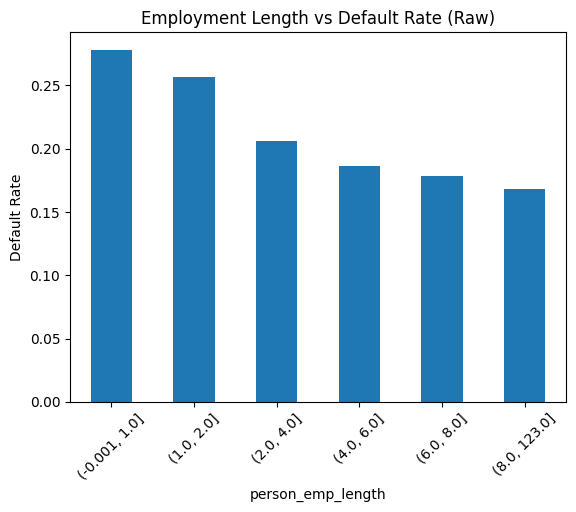

In [12]:
# Raw employment length
df_raw = pd.read_csv("../data/raw/raw.csv")

raw_bins = pd.qcut(df_raw["person_emp_length"], 6, duplicates="drop")
raw_default = df_raw.groupby(raw_bins)["loan_status"].mean()

plt.figure()
raw_default.plot(kind="bar")
plt.title("Employment Length vs Default Rate (Raw)")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()


C:\Users\jayra\AppData\Local\Temp\ipykernel_31944\1579019862.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()


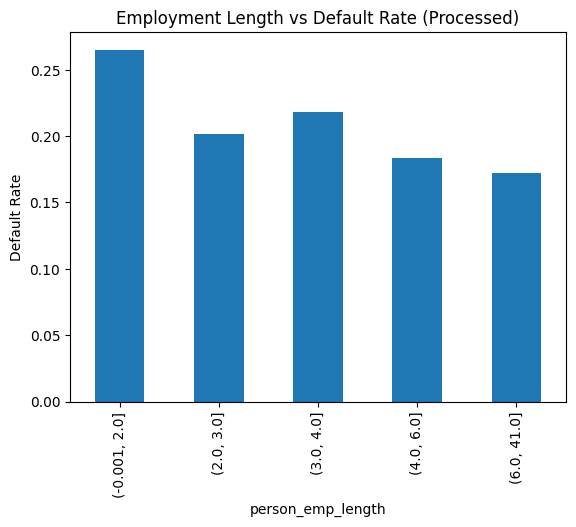

In [14]:
proc_bins = pd.qcut(df_proc["person_emp_length"], 6, duplicates="drop")
proc_default = df_proc.groupby(proc_bins)["loan_status"].mean()

plt.figure()
proc_default.plot(kind="bar")
plt.title("Employment Length vs Default Rate (Processed)")
plt.ylabel("Default Rate")
plt.show()


<small> **Observation**

1. Employment stability and Loan burden preserve the same monotonic trend after processing. 
2. Employment Length shows minor deviation from raw dataset, but overall risk trend seems to be consistent 


**Notes**

1. Only Loan burden, Loan Stability, Employment Length are taken because preprocessing steps mainly affects these categories 